# Ross Downey - Machine Learning & Statistics

# ATU - Winter 2022

## Models - Exercises

### Exercise 2.1
***
<br><br>
Use numpy and matplotlib to plot the absolute value function. <br>

Research and explain why the absolute value function is not typically used in fitting straight lines to data.
***


### Background
The purposes of this exercise is to plot the linear regression model using numpy and matplotlib. <br>
Instead of using the sum of least squares method, this plot will involve the use of absolute values <br>
for calculating the cost.<br>
An explanation will be provided as to why this is not the typical approach <br>
***

In [1]:
# Import matplotlib, scipy and numpy
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

# Changing default size of plots for better presentation
plt.rcParams['figure.figsize'] = (8, 6)

## Example
Preferrable to use an example of a real world activity instead of just pure numbers to outline. <br>
In this case a pharmaceutcial laboratory analyst is preparing a set of calibration standards <br>
for use in quantifying a set of drug substance samples with possible impurities. <br>
The analyst creates a set of standards in the range of 0 to 100ppm (parts per million) in increments of 5ppm.<br>
The analyst can then run samples, of unknown concentration, and quantify these samples using the calibration plot.

In [20]:
# Generate plot using numpy
# x-axis values will be the calibration standard's concentration (input variables)
# y-axis values will be the measured response of these standards in Au (Absorbance units, arbitrary) (measured variable)

# stds array up to 100ppm in increments of 5ppm
stds = np.arange(0.0, 100, 5.0)
# results array (in absorbance units, au)
# 20 is slope, 0.1 is y-intercept
# Noise is introduced as not all measurments are 100% accurate, instrument variations, preparation variations etc.
# Mean of 0.0 for noise, std deviation of 20.0 and 20 values
au = 20 * stds + 0.1 + np.random.normal(0.0, 40.0, stds.size)

In [14]:
stds

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [21]:
au

array([  61.36976845,   85.12074726,  144.12686116,  347.93106151,
        404.379517  ,  434.93904368,  582.53430887,  704.74392339,
        816.76616762,  898.03057293, 1012.41867686, 1111.56923777,
       1167.46056976, 1348.33819662, 1404.35996376, 1481.76748752,
       1558.46671434, 1710.34074098, 1757.51349504, 1902.52260403])

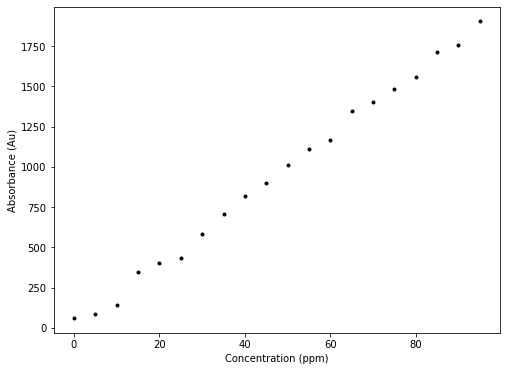

In [22]:
# Plotting for visual understanding

plt.plot(stds, au, 'k.')

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

A straight line will now be fitted over the model using the equation of line from the generated data.<br>
There are numerous options for fitting a straight line but in this case it is sufficient to plot one.<br>
The equation of the line in this case (ignoring the random noise) is y = 20x + 0.1

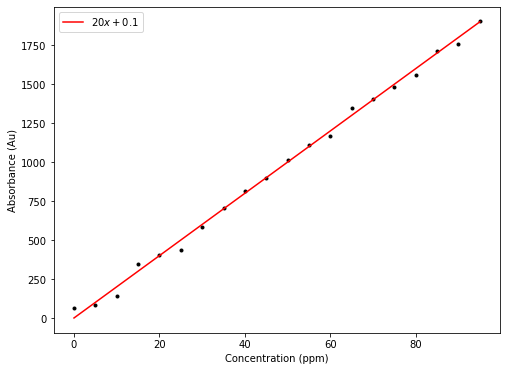

In [23]:
# Plot above data again
plt.plot(stds, au, 'k.')

# Overlay line of best fit on the plot.
x = np.arange(0.0, 100.0, 5.0)
plt.plot(x, 20.0 * x + 0.1, 'r-', label=r"$20x + 0.1$")


# Add a legend.
plt.legend()

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

The addition of the straight help to visually confirm the linear relationship between the two sets of data <br>
However, as some noise was added to each dependent y-value each data point does not fit perfectly on the line <br>
In the real world this is typcial, and a line of best fit is applied i.e. which line suits the data <br>
so that there are an equal number of datapoints above and below the line with equal distances between points and line. <br>
***


Of course, this line of best fit can also be calculated mathematically instead of visually estimating. <br>
In this calculation the vertical distance between datapoint and the line are calculated / measured <br>
This distance is then squared and applied to a formula to ascertain the "best" values of m(slope) and c (y-intercept). <br>
These values are known as the parameters and are used to determine the best model.<br>
This method of squaring the values is know as the least squares method and is done for a number of reasons <br>
These will be discussed below. <br>
For the purposes of this exercise instead of squaring the residual difference between points and line <br>
the absolute value will be employed instead of squaring. <br>
This can bring up some difficulties and challenges which will also be discussed below.
The best parameter values are known as the cost.
***


In [28]:
# Calculating the cost using absolute values (note no squaring of residuals)
cost = lambda m,c: np.sum([(au[i] - m * stds[i] - c) for i in range(stds.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (20.0, 0.1, cost(20.0, 0.1)))

Cost with m = 20.00 and c =  0.10:   -67.30


Issue already seen with using the absolute values is the presence of a negative cost. <br>
As we are not squaring the residual values some negative values will be seen <br>
Squaring the residuals removes all negative values <br>
***

The actual best values for slope and y-intercept can be calculated using the below code

In [31]:
# Calculate the best values for m and c.

# Need mean values of each dataset.
stds_avg = np.mean(stds)
au_avg = np.mean(au)

# Subtract means from each variable
stds_zero = stds - stds_avg
au_zero = au - au_avg

# Best value for m
m = np.sum(stds_zero * au_zero) / np.sum(stds_zero * stds_zero)

# Use m from above to calculate the best c.
c = au_avg - m * stds_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 19.833356 and c is 4.650583.


The above implies that the actual best line to fit the data is y = m(19.83) + 4.65. <br>
Note: removing the square values from the best value for m calculation led to a code error. <br>
This is because it was trying to divide by zero in some cases. Another flaw in the absolute values method. <br>
***

Numpy also has a function called polyfit which will determine the best parameter values

In [36]:
np.polyfit(stds, au, 1)

array([19.83335579,  4.650583  ])

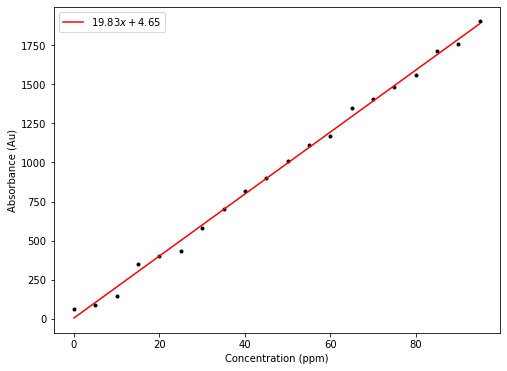

In [34]:
# Plot above data again
plt.plot(stds, au, 'k.')

# Overlay line of best fit on the plot, using best values determined
x = np.arange(0.0, 100.0, 5.0)
plt.plot(x, 19.83 * x + 4.65, 'r-', label=r"$19.83x + 4.65$")


# Add a legend.
plt.legend()

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

## Issues with using absolute values

There are a few issues with using absolute values instead of the least squares method <br>
As mentioned above, using the absolute values leaves negative values for some of the residual values <br>
Squaring these removes the negative values. <br>
If we were to use the absolute values then we would have positive and negative values in our assessment. <br>
These could then start to cancel each other out leading to a less accurate calculation of the m value <br>
where the sum of all is used [1].
Another benefit of the least squares method is that each difference is, in a way magnified, <br>
by squaring the value. This helps us to determine the best parameters in a more accurate manner <br>
as the error has been increased.<br>
In terms of mathemtically calculating the best value of m the differentiation of certain values is needed <br>
where the first derivative is set equal to zero. <br>
This cannot be done using calculus, but can be done by estimating best fit values and measuring the resiudals.<br>
From this it can be stated that the least squares method is a much simpler way of measuring the best parameter<br>
values of a linear plot.

## References
[1] https://www.bradthiessen.com/html5/docs/ols.pdf


***
# End